# Homework 2
## Student Name: Shyam Gupta
## Submission Date: Oct-8-2024

In [6]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('laptops.csv')
df.head(2)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [8]:
# Normalize column names: lowercase column names, replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [9]:
# Only use the specified columns: ram, storage, screen, final_price
df = df[['ram','storage','screen','final_price']]
df.head(2)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0


<Axes: xlabel='final_price', ylabel='Count'>

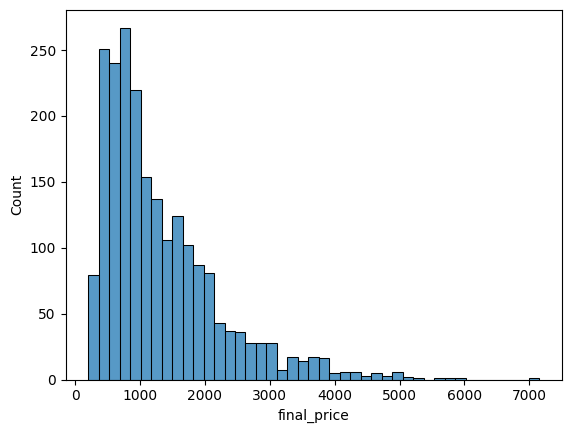

In [10]:
# Does final_price have a long tail?
sns.histplot(df.final_price)

In [11]:
# Question 1: Name the column with missing values
# Answer: 'screen' column has 4 missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [12]:
# Question 2: What is the median for variable 'ram'
# Answer: 16.0
print(df['ram'].median())

16.0


In [13]:
# Split the dataset, use seed=42, train = 60%, validation=20% and test=20%
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Reset index and drop it
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

# Log transform target variable for each dataset
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

# Delete the 'final_price' column from datasets
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

print(f'Dataset Size: Training - {len(df_train)}, Validation - {len(df_val)}, Test - {len(df_test)}')

Dataset Size: Training - 1296, Validation - 432, Test - 432


RMSE value with training dataset is 0.45
RMSE value with validation dataset is is 0.43


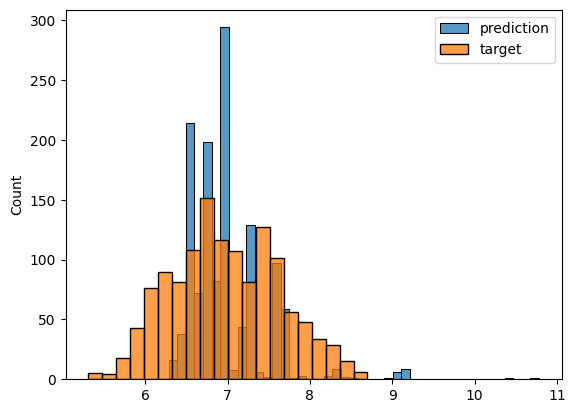

In [14]:
# Option 1: Filling missing values with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)
df_test_0 = df_test.fillna(0)

# Calculate the weight vector
def train_linear_regression(X,y):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

# Convert df_train_0 to a NumPy array
X_train_0 = df_train_0.values

w_0, w = train_linear_regression(X_train_0,y_train)
y_pred = w_0 + X_train_0.dot(w)

# Check how good the predictions are
sns.histplot(y_pred,label='prediction')
sns.histplot(y_train,label='target')
plt.legend()

# Finding RMSE
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return round(np.sqrt(mse),2)

print(f'RMSE value with training dataset is {rmse(y_train,y_pred)}')

# Validating the model
X_val_0 = df_val_0.values
y_pred = w_0 + X_val_0.dot(w)
print(f'RMSE value with validation dataset is is {rmse(y_val,y_pred)}')

RMSE value with training dataset is 0.45
RMSE value with validation dataset is 0.43


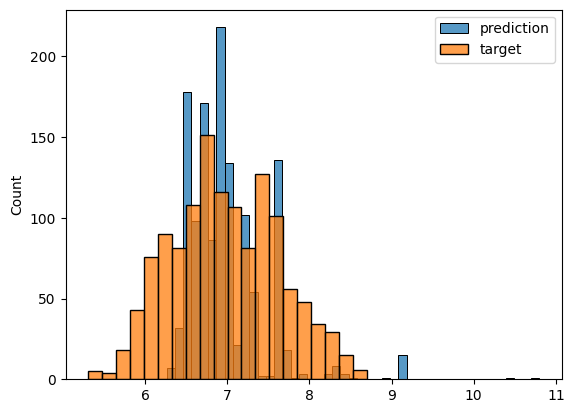

In [15]:
# Option 2: Filling missing values with mean
df_train_mean = df_train.fillna(df_train['screen'].mean())
df_val_mean = df_val.fillna(df_val['screen'].mean())

# Calculate the weight vector
def train_linear_regression1(X,y):
    # adding dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

# Convert df_train_mean to a NumPy array
X_train_mean = df_train_mean.values

w_0, w = train_linear_regression1(X_train_mean,y_train)
y_pred_mean = w_0 + X_train_mean.dot(w)

# Check how good the predictions are
sns.histplot(y_pred_mean,label='prediction')
sns.histplot(y_train,label='target')
plt.legend()

# Finding RMSE
def rmse1(y,y_pred_mean):
    error = y_pred_mean - y
    mse = (error**2).mean()
    return round(np.sqrt(mse),2)

print(f'RMSE value with training dataset is {rmse1(y_train,y_pred_mean)}')

# Validating the model
X_val_mean = df_val_mean.values
y_pred_mean = w_0 + X_val_mean.dot(w)
print(f'RMSE value with validation dataset is {rmse1(y_val,y_pred_mean)}')

# Question 4: Regularized Linear Regression

In [23]:
# Regularized Linear Regression Model
def reg_linear_regression(X,y,r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

for r in [0,0.01,0.1,1,5,10,100]:
    w_0,w = reg_linear_regression(df_train_0,y_train, r=r)
    y_pred = w_0 + X_val_0.dot(w)
    print(f'validation for r = {r},',rmse(y_val,y_pred))

validation for r = 0, 0.43
validation for r = 0.01, 0.43
validation for r = 0.1, 0.43
validation for r = 1, 0.43
validation for r = 5, 0.46
validation for r = 10, 0.51
validation for r = 100, 0.67


# Question 5: Effect of using different seed values

In [39]:
# Use different seed values
seed_values = [0,1,2,3,4,5,6,7,8,9]
std_dev = []
for seed in seed_values:
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train : n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    # Reset index and drop it
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    # Log transform target variable for each dataset
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)
    # Delete the 'final_price' column from datasets
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    # Option 1: Filling missing values with 0
    df_train_0 = df_train.fillna(0)
    df_val_0 = df_val.fillna(0)
    df_test_0 = df_test.fillna(0)
    # Convert df_train_0 to a NumPy array
    X_train_0 = df_train_0.values
    w_0, w = train_linear_regression(X_train_0,y_train)
    y_pred = w_0 + X_train_0.dot(w)
    std_dev.append(rmse(y_train,y_pred))
    print(f'RMSE score for seed value {seed} is {rmse(y_train,y_pred)}')

print(f'Standard Deviation of RMSE scores is {round(np.std(std_dev),3)}')
    

RMSE score for seed value 0 is 0.43
RMSE score for seed value 1 is 0.43
RMSE score for seed value 2 is 0.44
RMSE score for seed value 3 is 0.43
RMSE score for seed value 4 is 0.43
RMSE score for seed value 5 is 0.43
RMSE score for seed value 6 is 0.44
RMSE score for seed value 7 is 0.44
RMSE score for seed value 8 is 0.44
RMSE score for seed value 9 is 0.44
Standard Deviation of RMSE scores is 0.005


# Question 6: Used seed 9 and r = 0.001, find RMSE

In [55]:
# Use seed = 9
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# Combine training and validation datasets
dataset = df_train + df_val
target = np.append(y_train,y_val)

# Fill missing values with 0
dataset = dataset.fillna(0)

# Regularized Linear Regression
w_0,w = reg_linear_regression(dataset, target,r=0.001)



ValueError: shapes (4,1296) and (1728,) not aligned: 1296 (dim 1) != 1728 (dim 0)